In [3]:
import numpy as np
import pandas as pd

# load dataset into DataFrame Pandas
# the chosen dataset is the Kaggle : "Sentiment140 dataset with 1.6 million tweets" - contains 1,600,000 tweets extracted using the twitter api
data = pd.read_csv(
    "twitter-sentiment104analysis-kaggle-database.csv",
    encoding="latin-1",
)
data.columns = ["target", "ids", "date", "flag", "user", "text"]

display(data)

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
# the kaggle description states that target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive) however it looks like there are no neutral values
set(data.target)

{0, 4}

In [5]:
#to classify (positive/negative), we need squash this number in the range [0, 1] for the sigmoid function
data.target = (data.target).replace(4,1)
pd.set_option('display.max_colwidth', None)
display(data[['target', 'text']])

,target,text
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,1,Just woke up. Having no school is the best feeling ever
1599995,1,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599996,1,Are you ready for your MoJo Makeover? Ask me for details
1599997,1,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur


In [6]:
#taking into consideration the target - sentiment and text - tweet
tweet = data.columns.values[5]
sentiment = data.columns.values[0]
tweet, sentiment

('text', 'target')

In [7]:
#preprocessing of the tweets:

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
from tools.PreprocessTwt import CustomPreprocess

custom = CustomPreprocess()

data['processed_tweet'] = data[tweet].apply(custom.process_tweet)
print(data['processed_tweet'].head(10))



0    upset update facebook texting might cry result school today also blah
1                        dived many times ball managed save rest go bounds
2                                         whole body feels itchy like fire
3                                                  no not behaving mad see
4                                                           not whole crew
5                                                                 need hug
6                   hey long time no see yes rains bit bit lol fine thanks
7                                                                nope didn
8                                                                que muera
9                                          spring break plain city snowing
Name: processed_tweet, dtype: object


In [8]:
#tokenization
tokenized_tweet = data['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head(10)

0    [upset, update, facebook, texting, might, cry, result, school, today, also, blah]
1                          [dived, many, times, ball, managed, save, rest, go, bounds]
2                                              [whole, body, feels, itchy, like, fire]
3                                                        [no, not, behaving, mad, see]
4                                                                   [not, whole, crew]
5                                                                          [need, hug]
6                  [hey, long, time, no, see, yes, rains, bit, bit, lol, fine, thanks]
7                                                                         [nope, didn]
8                                                                         [que, muera]
9                                                [spring, break, plain, city, snowing]
Name: processed_tweet, dtype: object

In [9]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head(10)

0    [upset, update, facebook, texting, might, cry, result, school, today, also, blah]
1                            [dived, many, time, ball, managed, save, rest, go, bound]
2                                               [whole, body, feel, itchy, like, fire]
3                                                        [no, not, behaving, mad, see]
4                                                                   [not, whole, crew]
5                                                                          [need, hug]
6                   [hey, long, time, no, see, yes, rain, bit, bit, lol, fine, thanks]
7                                                                         [nope, didn]
8                                                                         [que, muera]
9                                                [spring, break, plain, city, snowing]
Name: processed_tweet, dtype: object

In [10]:
data['processed_tweet'] = tokenized_tweet
display(data)

,target,ids,date,flag,user,text,processed_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,"[upset, update, facebook, texting, might, cry, result, school, today, also, blah]"
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,"[dived, many, time, ball, managed, save, rest, go, bound]"
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[whole, body, feel, itchy, like, fire]"
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.","[no, not, behaving, mad, see]"
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,"[not, whole, crew]"
...,...,...,...,...,...,...,...
1599994,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever,"[woke, no, school, best, feeling, ever]"
1599995,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta,"[thewdb, com, cool, hear, old, walt, interview, â]"
1599996,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details,"[ready, mojo, makeover, ask, detail]"
1599997,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur,"[happy, th, birthday, boo, time, tupac, amaru, shakur]"


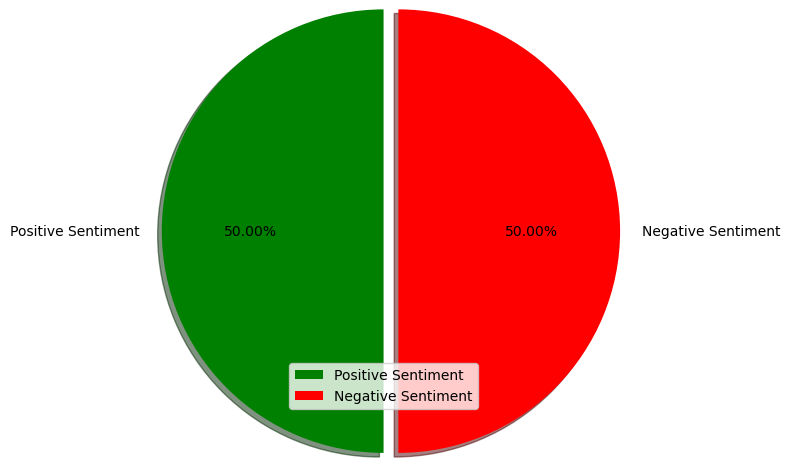

In [11]:
#information about the used words found in the tweets
sentiments = ['Positive Sentiment', 'Negative Sentiment'] 
slices = [(data[sentiment] == 1).sum(), (data[sentiment] == 0).sum()] 
colors = ['g', 'r'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show()
#as we can see below the data base contains an equal amount of positive and negative tweets

<Figure size 3840x2880 with 0 Axes>

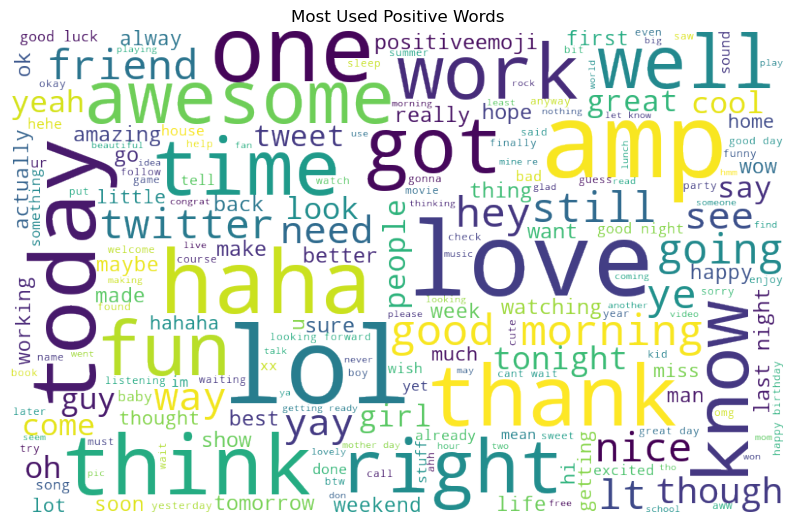

In [12]:
positive_words = ' '.join([text for text_list in data['processed_tweet'][data[sentiment] == 1] for text in text_list])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(positive_words)

plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Positive Words")
plt.savefig('tools/positive_words.png')
plt.show()

<Figure size 3840x2880 with 0 Axes>

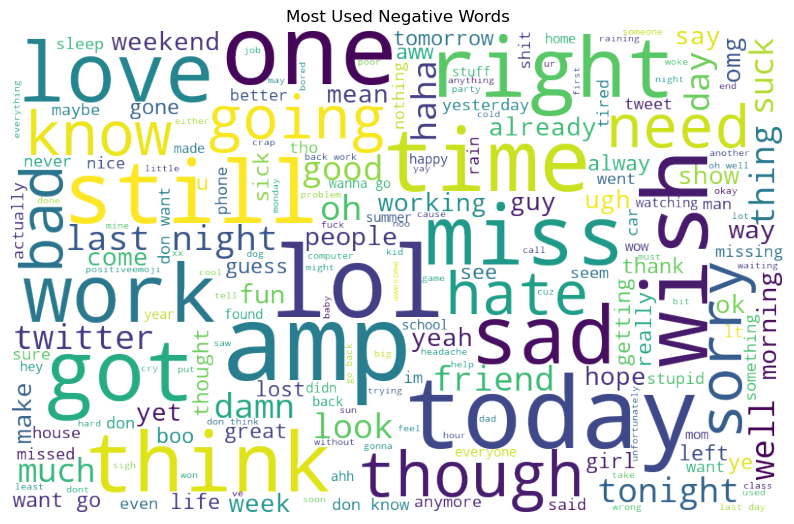

In [13]:
negative_words = ' '.join([text for text_list in data['processed_tweet'][data[sentiment] == 0] for text in text_list])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(negative_words)

plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Negative Words")
plt.savefig('tools/negative_words.png')
plt.show()

In [22]:
#count vectorizer: it counts the number of words in the document i.e it converts a collection of text documents to a matrix of the counts of occurrences of each word in the document
from sklearn.feature_extraction.text import CountVectorizer
import json
import pickle

count_vectorizer = CountVectorizer(ngram_range=(1, 2))  # unigram and bigram
final_vectorized_data = count_vectorizer.fit_transform(data['processed_tweet'].astype(str))

# save tokenizer information - for future use of the model?
tokenizer_data = {
    "vocabulary": count_vectorizer.vocabulary_,
    "ngram_range": count_vectorizer.ngram_range,
}

with open("tools/tokenizerNB.json", "w") as f:
    json.dump(tokenizer_data, f)
    
# Save the CountVectorizer
vectorizer_file = 'tools/count_vectorizer.pkl'
with open(vectorizer_file, 'wb') as file:
    pickle.dump(count_vectorizer, file)

final_vectorized_data

<1599999x3974363 sparse matrix of type '<class 'numpy.int64'>'
	with 20926416 stored elements in Compressed Sparse Row format>

In [15]:
#splitting train data to test accuracy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, data[sentiment], test_size=0.1, random_state=8)  
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (1439999, 3974363)
X_test_shape :  (160000, 3974363)
y_train_shape :  (1439999,)
y_test_shape :  (160000,)


In [16]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB 

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

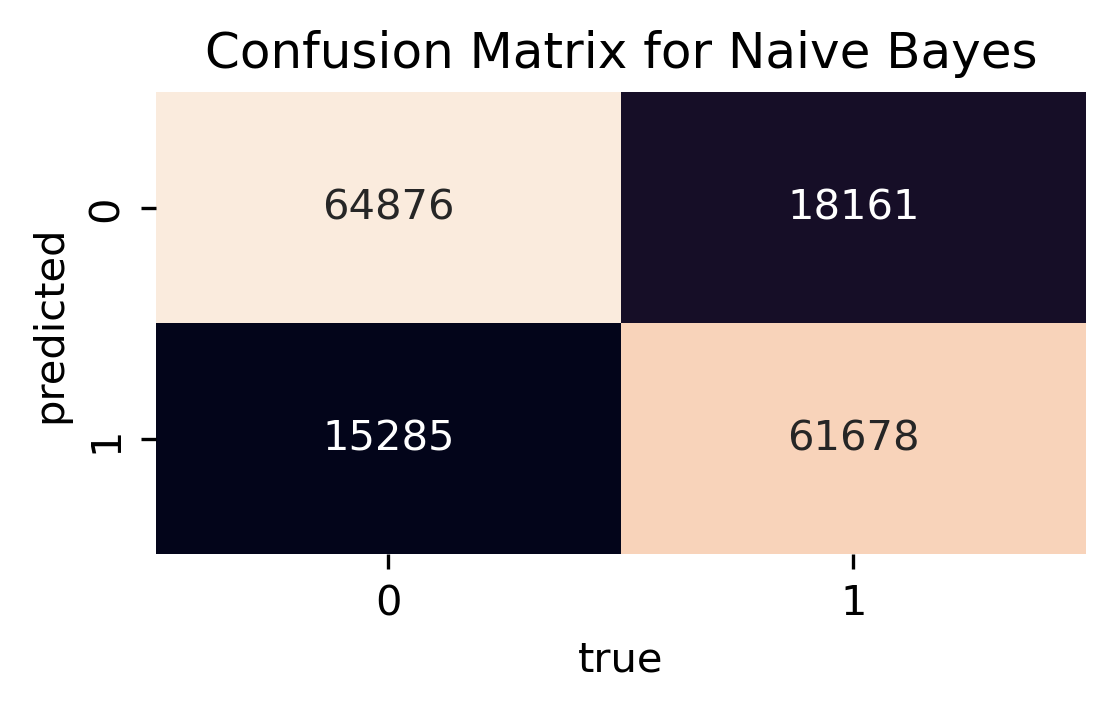

In [17]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(4, 2), dpi=300)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true')
plt.ylabel('predicted')
plt.savefig("tools/confusion_matrix.png")
plt.show()

In [18]:
#accuracy of our prediction
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

#Accuracy with Naive-bayes:  0.79195 - removing stop words(own list) + contradictions + lemmatization - split 0.2
#Accuracy with Naive-bayes:  0.80170625 - keeping stop words and not removing contradictions + lemmatization - split 0.2
#Accuracy with Naive-bayes:  0.801755 - keeping stop words + contradictions + lemmatization - split 0.2
#Accuracy with Naive-bayes:  0.7909625 - removing stop words(own list) + contradictions + lemmatization - split 0.1

Accuracy with Naive-bayes:  0.7909625


In [19]:
# precision, recall, and accuracy
# Precision measures how many texts were predicted correctly as belonging to a given category out of all of the texts that were predicted (correctly and incorrectly)
# Recall measures how many texts were predicted correctly as belonging to a given category out of all the texts that should have been predicted as belonging to the category
# Accuracy measures how many texts were predicted correctly (both as belonging to a category and not belonging to the category)
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80     80161
           1       0.80      0.77      0.79     79839

    accuracy                           0.79    160000
   macro avg       0.79      0.79      0.79    160000
weighted avg       0.79      0.79      0.79    160000



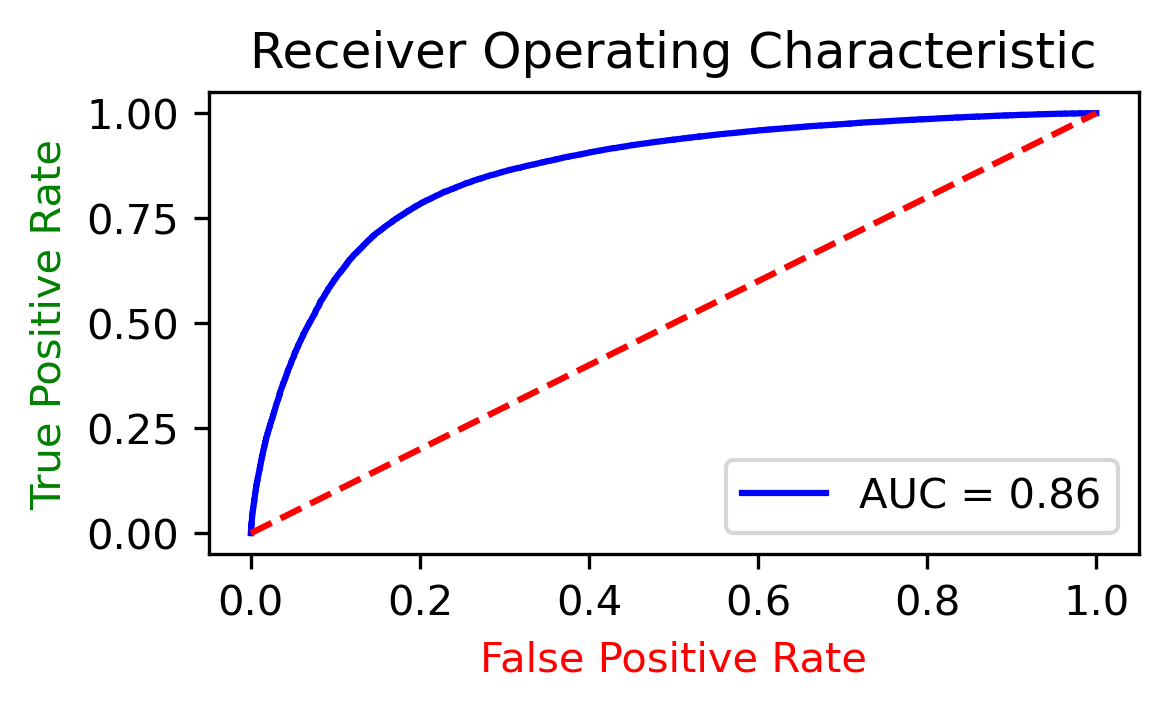

In [20]:
# ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# calculate the fpr and tpr for all thresholds of the classification
probs = model_naive.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
fig, ax = plt.subplots(figsize=(4, 2), dpi=300)                       
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) # *Area Under the Curve of anything greater than 0.80 with real life data is ok-ish
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', color='g')
plt.xlabel('False Positive Rate', color='r')
plt.savefig("tools/ROC_curve.png")
plt.show()


In [21]:
import pickle

# Save the trained classifier
classifier_file = 'tools/naive_bayes_classifier.pkl'
with open(classifier_file, 'wb') as file:
    pickle.dump(model_naive, file)
